# 서울시 공유자전거 '따릉이' 수요 예측 프로젝트
## 단계1. 데이터 전처리

## 0.프로젝트 소개

### (1) 수행 목표 
여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

#### 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

    * 1.데이터를 탐색하며 정보 획득
        * 날씨 데이터와 서울시 공유 자전거 따릉이의 수요 데이터를 제공해드렸습니다. 
        * 우리는 따릉이의 수요와 날씨간 어떤 연관성이 있는지 탐색 해 봅시다.
    * 2.EDA
        * 주어진 데이터의 변수들을 분석해 봅시다. 


### (2) 데이터 소개

#### 1) 기본 데이터

        * 학습데이터 : sbikedata.csv

#### 2) 데이터셋의 변수 소개

        * date : 날짜
        * hour : 시간
        * temperature : 온도
        * precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
        * windspeed : 풍속(평균)
        * humidity : 습도
        * visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
        * ozone : 오존 수치
        * PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
        * PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
        * count : 시간에 따른 따릉이 대여 수


## 1.환경설정

* 세부 요구사항
    - 경로 설정 
        * 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정 및 라이브러리 로딩
* 이번 프로젝트는 로컬환경에서 진행합니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [3]:
path = 'sbikedata.csv'

#### 2) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



### (2) 데이터 불러오기
* 주어진 데이터셋
    * 따릉이 수요 및 날씨 데이터 : sbikedata.csv

#### 1) 데이터로딩

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = pd.read_csv(path)

In [5]:
data.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


#### 2) 기본 정보 조회
- 데이터를 head, tail. describe, info 등을 활용하여 확인하세요.

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.tail()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
5826,2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.describe()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
count,5827.000000,5725.000000,5732.000000,5699.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
mean,11.506607,31.970655,15.666609,0.031811,19.376798,0.075511,2.237601,68.608718,1758.438648,215.117899
std,6.921963,42.987292,13.850990,0.018277,7.501572,0.264236,1.054516,17.277266,490.969394,185.972900
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.000000,60.000000,1.000000
25%,6.000000,16.000000,7.000000,0.019000,14.100000,0.000000,1.500000,56.000000,1935.500000,53.000000
50%,12.000000,25.000000,13.000000,0.031000,20.400000,0.000000,2.200000,70.000000,2000.000000,186.000000
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.000000,2000.000000,315.000000
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.000000,2000.000000,1746.000000


In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


## 2.EDA 1단계 - 데이터 기본 탐색

* 단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

    * <span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

        1. 변수가 내포하고 있는 의미
        2. 변수가 수치형인지, 범주형인지
        3. 결측치 존재 여부 및 조치 방안
        4. 기초 통계량 확인
        5. 데이터 분포 확인
        6. 위 정보로부터 파악한 내용 정리
        7. 추가 분석사항 도출

### (1) 변수별 단변량 분석

#### 1) Feature1 : hour

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['hour']

0        1
1        2
2        3
3        4
4        5
        ..
5822    20
5823    21
5824    22
5825    23
5826     0
Name: hour, Length: 5827, dtype: int64

변수가 내포하고 있는 의미
- 시간을 24시로 표현

변수가 수치형인지 범주형인지
- 시간은 범주형? 수치형?

In [22]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(data['hour'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB
None


변수의 결측치 존재 여부 및 조치방안

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
missing_values = data['hour'].isnull().sum()
print(missing_values)

0


변수의 기초 통계량 확인

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

변수의 분포 확인
* kdeplot 활용

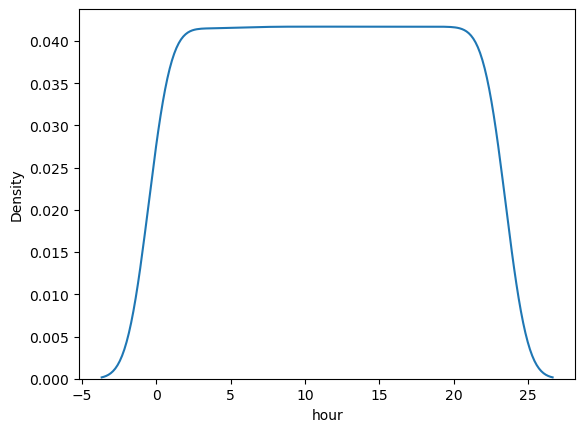

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.kdeplot(data['hour'])
plt.show()


위 정보로 부터 파악한 내용 정리
- 데이터의 '시간' 열은 5827개 row로 구성되어있으며 결측치는 없음
- 0시 및 일부 중간시간대 데이터가 비어있음

#### 2) Feature2 : temperature

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 온도


In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['temperature']

0       13.1
1       12.4
2       13.1
3       13.0
4       13.0
        ... 
5822     9.3
5823     8.4
5824     8.6
5825     8.2
5826     7.9
Name: temperature, Length: 5827, dtype: float64

변수가 수치형인지 범주형인지
- 기온은 수치형? 범주형?

In [21]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(data['temperature'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: temperature
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB
None


변수의 결측치 존재 여부 및 조치방안

In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
missing_values = data['temperature'].isnull().sum()
print(missing_values)

0


변수의 기초 통계량 확인

In [23]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

변수의 분포 확인

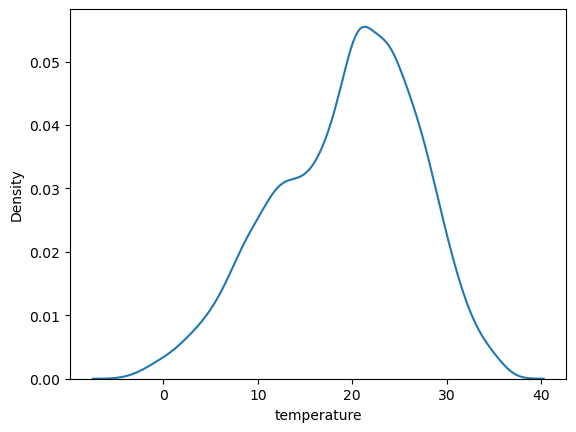

In [24]:
sns.kdeplot(data['temperature'])
plt.show()

위 정보로 부터 파악한 내용 정리


In [ ]:
# 데이터의 '온도' 열은 5827개 row로 구성되어있으며 결측치는 없음
# 20 ~ 30도인 따듯한 온도에서 많이 사용했다는 것을 알 수 있다.

#### 3) Feature3 : precipitation

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 강우 여부 (비가 안왔으면 0, 왔으면 1)

In [25]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# rain = data.loc[data['precipitation']==0, 'precipitation']
# notrain = data.loc[data['precipitation']==1, 'precipitation']

변수가 수치형인지 범주형인지
- 1시간 전 강우 유무는 범주형? 수치형?

In [39]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['precipitation']

0       0
1       0
2       0
3       0
4       0
       ..
5822    0
5823    0
5824    0
5825    0
5826    0
Name: precipitation, Length: 5827, dtype: int64

In [87]:
print(data['precipitation'].info())

<class 'pandas.core.series.Series'>
Index: 5670 entries, 0 to 5826
Series name: precipitation
Non-Null Count  Dtype
--------------  -----
5670 non-null   int64
dtypes: int64(1)
memory usage: 88.6 KB
None


변수의 결측치 존재 여부 및 조치 방안


In [89]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
missing_values = data['precipitation'].isnull().sum()
print(missing_values)

0


변수의 기초 통계량 확인

In [90]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['precipitation'].describe()

count    5670.000000
mean        0.075309
std         0.263912
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

변수의 분포 확인

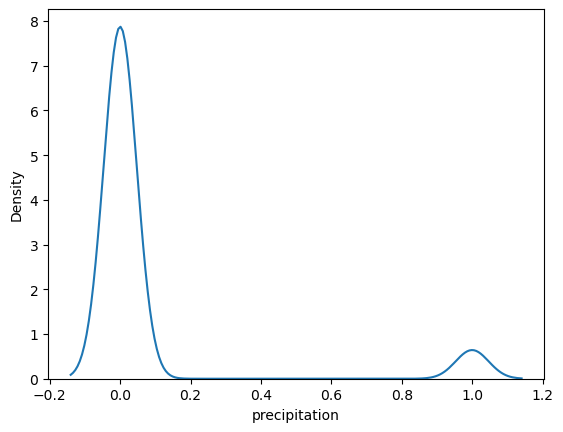

In [91]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 시각화
sns.kdeplot(data['precipitation'])
plt.show()

위 정보로 부터 파악한 내용 정리


#### 4) Feature4 : windspeed

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 풍속, 풍량

In [45]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['windspeed'].value_counts()


windspeed
2.3    255
2.2    246
2.1    242
1.9    239
1.7    235
      ... 
6.9      1
5.8      1
6.8      1
6.4      1
6.2      1
Name: count, Length: 72, dtype: int64

변수가 수치형인지 범주형인지


In [46]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(data['hour'].info())


<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB
None


변수의 결측치 존재 여부 및 조치방안

In [47]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
missing_values = data['hour'].isnull().sum()
print(missing_values)


0


변수의 기초 통계량 확인

In [48]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['hour'].describe()


count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

변수의 분포 확인

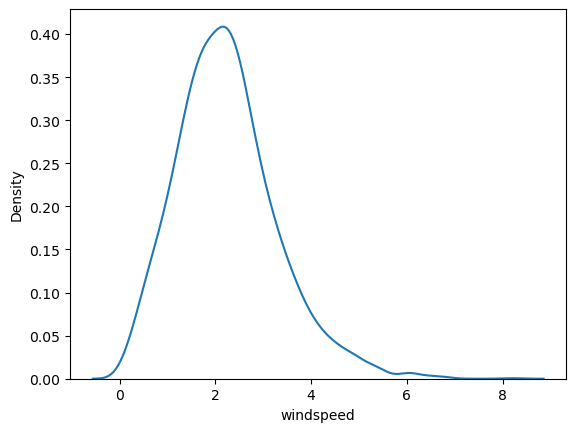

In [49]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.kdeplot(data['windspeed'])
plt.show()

위 정보로 부터 파악한 내용 정리


In [ ]:
# 바람이 2일때가 가장 많이 빌렸음.

#### 5) Feature5 : humidity

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 습도

In [50]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['humidity']

0       49
1       53
2       43
3       44
4       44
        ..
5822    66
5823    70
5824    70
5825    71
5826    71
Name: humidity, Length: 5827, dtype: int64

변수가 수치형인지 범주형인지


In [51]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(data['humidity'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: humidity
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB
None


변수의 결측치 존재 여부 및 조치방안

In [52]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
missing_values = data['humidity'].isnull().sum()
print(missing_values)

0


변수의 기초 통계량 확인

In [53]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['humidity'].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

변수의 분포 확인

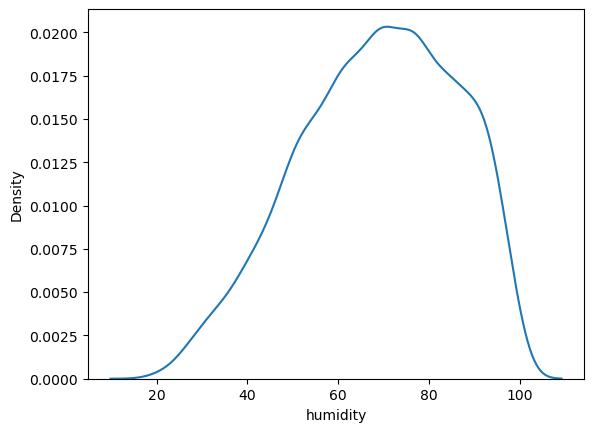

In [54]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.kdeplot(data['humidity'])
plt.show()

위 정보로 부터 파악한 내용 정리


In [ ]:
# 습도가 60 ~ 80 이때 높은 것으로 확인됨. 의외의 결과
# 고려해볼 점은 따릉이가 한강에서 타기 위해 많이 빌리는 경우를 경험하였기 때문에 그 영향이 있다고 생각함

#### 6) Feature6 : visibility

변수가 내포하고 있는 의미
- 대여 시점의 시계 (시정 거리)

In [55]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['visibility']

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
5822    1193
5823    1233
5824    1250
5825    1262
5826    1483
Name: visibility, Length: 5827, dtype: int64

변수가 수치형인지 범주형인지

In [56]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(data['visibility'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: visibility
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB
None


변수의 결측치 존재 여부 및 조치방안

In [57]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
missing_values = data['visibility'].isnull().sum()
print(missing_values)

0


변수의 기초 통계량 확인

In [58]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['visibility'].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

변수의 분포 확인

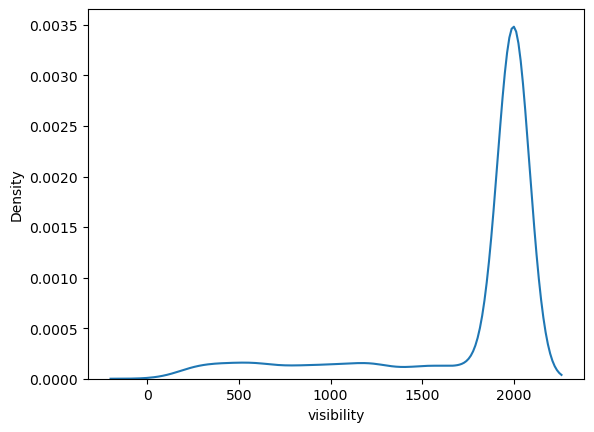

In [59]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.kdeplot(data['visibility'])
plt.show()

위 정보로 부터 파악한 내용 정리


In [ ]:
# 시정거리가 높을 때 대여 수도 많은 것을 확인했다. 날씨가 맑을 수록 대여 수가 높다는 것을 알 수 있다.

#### 7) Feature7 : ozone

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 오존 수치

In [60]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['ozone']

0       0.002
1       0.003
2       0.023
3       0.028
4       0.008
        ...  
5822    0.002
5823    0.002
5824    0.002
5825    0.001
5826    0.004
Name: ozone, Length: 5827, dtype: float64

변수가 수치형인지 범주형인지


In [61]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(data['ozone'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: ozone
Non-Null Count  Dtype  
--------------  -----  
5699 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB
None


변수의 결측치 존재 여부 및 조치방안

In [62]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
missing_values = data['ozone'].isnull().sum()
print(missing_values)

128


만약 결측치가 존재한다면?-> 어떻게 처리할 것인가?

In [63]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = data.loc[data['ozone'].notnull()]

변수의 기초 통계량 확인

In [64]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['ozone'].describe()

count    5699.000000
mean        0.031811
std         0.018277
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

변수의 분포 확인

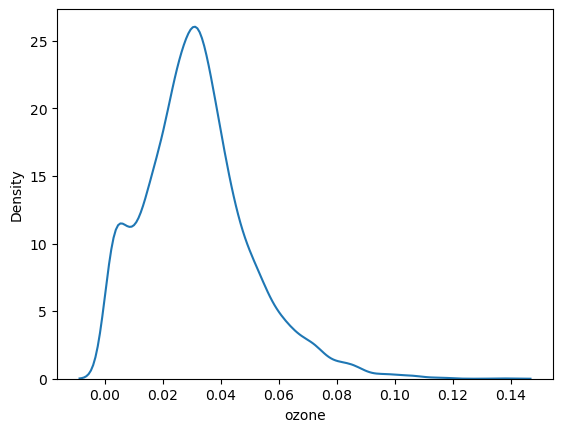

In [65]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.kdeplot(data['ozone'])
plt.show()

위 정보로 부터 파악한 내용 정리


In [ ]:
# 오존이 낮을 수록 대여 수가 높다는 것을 알 수 있었다.

#### 8) Feature8 : PM10

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 미세먼지 농도

In [66]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['PM10']

0       42.0
1       41.0
2       30.0
3       27.0
4       29.0
        ... 
5822    74.0
5823    65.0
5824    51.0
5825    43.0
5826    39.0
Name: PM10, Length: 5699, dtype: float64

변수가 수치형인지 범주형인지


In [67]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(data['PM10'].info())

<class 'pandas.core.series.Series'>
Index: 5699 entries, 0 to 5826
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
5677 non-null   float64
dtypes: float64(1)
memory usage: 89.0 KB
None


변수의 결측치 존재 여부 및 조치방안

In [69]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
missing_values = data['PM10'].isnull().sum()
print(missing_values)

22


In [70]:
data = data.loc[data['PM10'].notnull()]

변수의 기초 통계량 확인

In [71]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['PM10'].describe()


count    5677.000000
mean       31.588339
std        42.786622
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

변수의 분포 확인

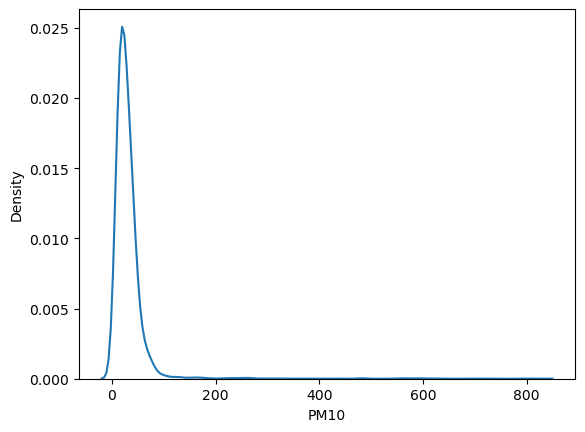

In [72]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.kdeplot(data['PM10'])
plt.show()

위 정보로 부터 파악한 내용 정리


In [ ]:
# PM10이 낮을 수록 따릉이 대여수가 높다.
# 미세먼지 농도가 낮을 수록 따릉이 대여수가 높다.

#### 9) Feature9 : PM2.5

변수가 내포하고 있는 의미
- 따릉이 대여시점의 초미세먼지 수치

In [73]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['PM2.5']

0       21.0
1       21.0
2       13.0
3       12.0
4       14.0
        ... 
5822    58.0
5823    56.0
5824    41.0
5825    35.0
5826    31.0
Name: PM2.5, Length: 5677, dtype: float64

변수가 수치형인지 범주형인지


In [74]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['PM2.5'].info()

<class 'pandas.core.series.Series'>
Index: 5677 entries, 0 to 5826
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
5670 non-null   float64
dtypes: float64(1)
memory usage: 88.7 KB


변수의 결측치 존재 여부 및 조치방안

In [76]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
missing_value = data['PM2.5'].isnull().sum()
print(missing_value)

7


In [77]:
data = data.loc[data['PM2.5'].notnull()]

변수의 기초 통계량 확인

In [78]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['PM2.5'].describe()

count    5670.000000
mean       15.332451
std        12.860270
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

변수의 분포 확인

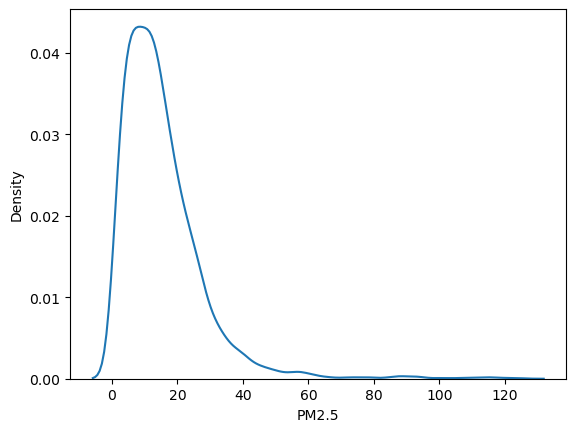

In [80]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.kdeplot(data['PM2.5']) 
plt.show()

위 정보로 부터 파악한 내용 정리


In [ ]:
# 초 미세먼지 농도가 낮을 수록 따릉이 대여 수가 높다

#### 10) Count (Target)

In [81]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['count']

0        46
1        40
2        31
3        12
4        30
       ... 
5822    273
5823    228
5824    215
5825    125
5826     95
Name: count, Length: 5670, dtype: int64

변수가 내포하고 있는 의미
- 따릉이의 대여량 -> 우리가 예측해야 할 변수!

In [82]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print(data['count'].info())

<class 'pandas.core.series.Series'>
Index: 5670 entries, 0 to 5826
Series name: count
Non-Null Count  Dtype
--------------  -----
5670 non-null   int64
dtypes: int64(1)
memory usage: 88.6 KB
None


변수가 수치형인지 범주형인지


변수의 결측치 존재 여부 및 조치 방안

In [83]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
missing_values = data['count'].isnull().sum()
print(missing_values)

0


변수의 기초 통계량 확인

In [84]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['count'].describe()

count    5670.000000
mean      215.869841
std       186.974342
min         1.000000
25%        53.000000
50%       186.000000
75%       317.000000
max      1746.000000
Name: count, dtype: float64

변수의 분포 확인

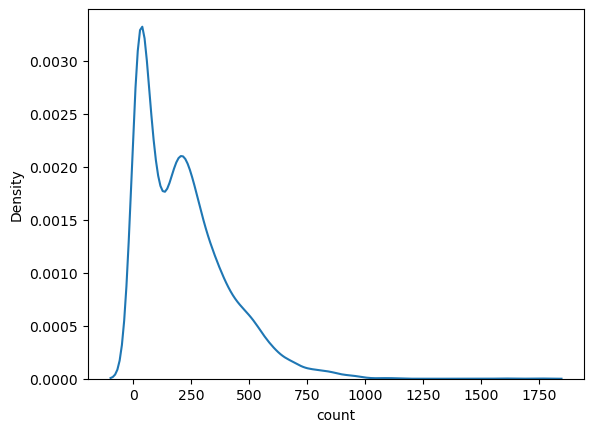

In [85]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.kdeplot(data['count'])
plt.show()

위 정보로 부터 파악한 내용 정리


In [86]:
# 해당 정보는 단순히 따릉이 대여수의 분포도를 확인한 것. 다른 변수들과의 연관을 해야함.